In [ ]:
#import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
#import Pytorch Lib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
import torch.optim as optim

In [ ]:
#matplotlib setting
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

In [ ]:
pcr_df = pd.read_csv('./농도테스트(201007).csv')
display(pcr_df)

,x1_10^6,x1_10^6.1,x1_10^6.2,x1_10^6.3,x1_10^6.4,x1_10^6.5,x2_10^6,x2_10^6.1,x2_10^6.2,x2_10^6.3,x2_10^6.4,x3_10^6,x3_10^6.1,x3_10^6.2,x3_10^6.3,x3_10^6.4,x4_10^6,x4_10^6.1,x4_10^6.2,x4_10^6.3,X1_10^5,X1_10^5.1,X1_10^5.2,X1_10^5.3,X1_10^5.4,X1_10^5.5,x2_10^5,x2_10^5.1,x2_10^5.2,x2_10^5.3,x2_10^5.4,x2_10^5.5,x3_10^5,x3_10^5.1,x3_10^5.2,x3_10^5.3,x3_10^5.4,x3_10^5.5,x4_10^5,x4_10^5.1,...,x2_10^3.6,x2_10^3.7,x2_10^3.8,x2_10^3.9,x2_10^3.10,x2_10^3.11,x2_10^3.12,x2_10^3.13,x3_10^3,x3_10^3.1,x3_10^3.2,x3_10^3.3,x3_10^3.4,x3_10^3.5,x3_10^3.6,x3_10^3.7,x3_10^3.8,x3_10^3.9,x3_10^3.10,x3_10^3.11,x3_10^3.12,x3_10^3.13,x4_10^3,x4_10^3.1,x4_10^3.2,x4_10^3.3,x4_10^3.4,x4_10^3.5,x4_10^3.6,x4_10^3.7,x4_10^3.8,x4_10^3.9,x4_10^3.10,x4_10^3.11,x4_10^3.12,x4_10^3.13,X1_Neg,X2_Neg,X3_Neg,X4_Neg
0,2169,1424,1461,1489,1360,2204,1469,1483,1464,2181,2295,1257,1323,1169,2075,1966,1483,2149,2445,2295,2091,2105,1953,1811,2048,1996,2217,2073,2091,2534,2247,2313,1828,1811,1725,1905,1805,1561,2206,2249,...,2691,2340,2543,2489,2442,2232.0,2653,2212,1890,1964,2066,1775,1922,1836,1669,1957,2068,2108,2055,1849,2349,1921,2132,2109,2450,2306,2382,2348,2451,2294,2761,2368,2754,2598,2913,2494,2020,2380,1948,2377
1,2164,1416,1454,1480,1348,2187,1451,1475,1464,2177,2274,1240,1330,1160,2054,1984,1465,2136,2423,2259,2077,2094,1939,1810,2039,1981,2242,2053,2065,2514,2248,2275,1828,1804,1726,1911,1800,1553,2181,2225,...,2551,2319,2497,2457,2412,2217.0,2609,2196,1907,1941,2055,1783,1902,1825,1651,1927,2060,2092,2040,1839,2343,1897,2117,2097,2441,2289,2357,2347,2418,2288,2740,2352,2750,2567,2851,2484,2003,2360,1913,2341
2,2167,1408,1446,1478,1344,2179,1447,1478,1460,2170,2265,1239,1324,1142,2029,1960,1460,2140,2419,2270,2068,2085,1916,1806,2022,1982,2238,2040,2051,2478,2251,2263,1825,1787,1716,1912,1767,1545,2175,2232,...,2505,2305,2484,2437,2390,2223.0,2610,2190,1904,1914,2051,1785,1902,1820,1753,1911,2050,2090,2021,1833,2346,1897,2122,2089,2426,2276,2342,2355,2418,2273,2732,2327,2743,2550,2825,2477,1989,2321,1917,2321
3,2172,1409,1436,1473,1335,2175,1450,1475,1459,2175,2252,1237,1320,1142,2022,1964,1450,2140,2414,2255,2056,2065,1908,1797,2022,1978,2229,2023,2041,2488,2244,2250,1817,1770,1695,1905,1753,1535,2173,2227,...,2468,2294,2474,2425,2362,2201.0,2595,2173,1903,1914,2060,1794,1883,1817,1723,1902,2047,2079,2014,1821,2358,1887,2115,2073,2416,2270,2339,2358,2419,2265,2722,2315,2728,2540,2798,2471,1997,2306,1903,2307
4,2174,1406,1428,1472,1332,2170,1448,1474,1457,2164,2264,1234,1316,1143,2040,1950,1445,2138,2399,2252,2053,2056,1895,1798,2015,1975,2224,2010,2040,2463,2239,2241,1802,1760,1679,1881,1786,1537,2169,2224,...,2421,2287,2477,2404,2316,2218.0,2565,2159,1884,1938,2025,1794,1865,1813,1717,1904,2042,2075,1992,1811,2370,1876,2100,2077,2413,2251,2319,2375,2411,2261,2716,2313,2712,2539,2776,2445,1993,2300,1896,2296
5,2173,1402,1422,1469,1327,2166,1437,1476,1453,2164,2260,1227,1308,1121,2038,1953,1447,2129,2388,2259,2037,2051,1883,1795,2013,1967,2216,2009,2035,2452,2243,2237,1805,1779,1679,1892,1780,1526,2161,2208,...,2399,2274,2450,2393,2293,2230.0,2553,2160,1889,1925,2027,1791,1860,1802,1722,1910,2034,2060,1981,1810,2367,1872,2094,2072,2416,2258,2316,2356,2402,2246,2701,2299,2691,2532,2756,2440,1995,2301,1886,2287
6,2177,1397,1419,1465,1322,2159,1431,1470,1457,2158,2255,1239,1302,1121,2036,1938,1440,2125,2390,2259,2039,2058,1881,1792,2007,1962,2217,2002,2025,2447,2237,2226,1790,1766,1683,1880,1769,1532,2153,2213,...,2384,2278,2459,2389,2278,2237.0,2547,2159,1897,1928,2030,1791,1866,1796,1712,1918,2024,2061,1981,1802,2358,1863,2099,2065,2420,2260,2318,2370,2394,2249,2694,2285,2701,2523,2739,2434,1989,2300,1880,2285
7,2176,1392,1418,1460,1323,2161,1432,1473,1458,2155,2249,1215,1284,1139,2028,1943,1432,2120,2387,2253,2033,2066,1876,1787,2010,1957,2226,1998,2026,2454,2245,2214,1801,1779,1688,1892,1750,1532,2143,2213,...,2357,2273,2458,2364,2275,2230.0,2544,2162,1884,1925,2034,1781,1859,1785,1713,1925,2010,2051,1965,1803,2363,1856,2092,2069,2415,2263,2320,2377,2391,2245,2

,X1_10^5,X1_10^5.1,X1_10^5.2,X1_10^5.3,X1_10^5.4,X1_10^5.5,x2_10^5,x2_10^5.1,x2_10^5.2,x2_10^5.3,x2_10^5.4,x2_10^5.5,x3_10^5,x3_10^5.1,x3_10^5.2,x3_10^5.3,x3_10^5.4,x3_10^5.5,x4_10^5,x4_10^5.1,x4_10^5.2,x4_10^5.3,x4_10^5.4,x4_10^5.5,x1_10^4,x1_10^4.1,x1_10^4.2,x1_10^4.3,x1_10^4.4,x1_10^4.5,x1_10^4.6,x1_10^4.7,x1_10^4.8,x1_10^4.9,x1_10^4.10,x1_10^4.11,x1_10^4.12,x1_10^4.13,x1_10^4.14,x1_10^4.15,...,x1_10^3.10,x1_10^3.11,x1_10^3.13,x2_10^3,x2_10^3.1,x2_10^3.2,x2_10^3.3,x2_10^3.4,x2_10^3.5,x2_10^3.6,x2_10^3.7,x2_10^3.8,x2_10^3.9,x2_10^3.10,x2_10^3.12,x2_10^3.13,x3_10^3,x3_10^3.1,x3_10^3.3,x3_10^3.4,x3_10^3.5,x3_10^3.7,x3_10^3.8,x3_10^3.9,x3_10^3.10,x3_10^3.11,x3_10^3.12,x3_10^3.13,x4_10^3.2,x4_10^3.3,x4_10^3.4,x4_10^3.5,x4_10^3.6,x4_10^3.7,x4_10^3.8,x4_10^3.9,x4_10^3.10,x4_10^3.11,x4_10^3.12,x4_10^3.13
0,2091,2105,1953,1811,2048,1996,2217,2073,2091,2534,2247,2313,1828,1811,1725,1905,1805,1561,2206,2249,2323,2273,2443,2230,1967,1997,1633,1793,1339,2241,2411,2418,1736,1940,1860,1903,1779,1979,1922,2191,...,2209,2178,2107,2193,2225,2104,2475,2023,2261,2691,2340,2543,2489,2442,2653,2212,1890,1964,1775,1922,1836,1957,2068,2108,2055,1849,2349,1921,2450,2306,2382,2348,2451,2294,2761,2368,2754,2598,2913,2494
1,2077,2094,1939,1810,2039,1981,2242,2053,2065,2514,2248,2275,1828,1804,1726,1911,1800,1553,2181,2225,2296,2241,2429,2215,1957,1973,1636,1777,1338,2227,2382,2402,1731,1904,1849,1878,1760,1959,1910,2164,...,2156,2159,2098,2184,2216,2093,2423,2017,2210,2551,2319,2497,2457,2412,2609,2196,1907,1941,1783,1902,1825,1927,2060,2092,2040,1839,2343,1897,2441,2289,2357,2347,2418,2288,2740,2352,2750,2567,2851,2484
2,2068,2085,1916,1806,2022,1982,2238,2040,2051,2478,2251,2263,1825,1787,1716,1912,1767,1545,2175,2232,2287,2237,2426,2218,1949,1993,1676,1766,1334,2223,2367,2381,1734,1893,1834,1867,1752,1938,1895,2150,...,2156,2145,2094,2176,2194,2074,2391,2009,2191,2505,2305,2484,2437,2390,2610,2190,1904,1914,1785,1902,1820,1911,2050,2090,2021,1833,2346,1897,2426,2276,2342,2355,2418,2273,2732,2327,2743,2550,2825,2477
3,2056,2065,1908,1797,2022,1978,2229,2023,2041,2488,2244,2250,1817,1770,1695,1905,1753,1535,2173,2227,2278,2233,2421,2202,1943,1956,1631,1757,1333,2215,2362,2389,1721,1885,1829,1856,1735,1926,1898,2126,...,2143,2143,2075,2169,2186,2071,2364,2003,2201,2468,2294,2474,2425,2362,2595,2173,1903,1914,1794,1883,1817,1902,2047,2079,2014,1821,2358,1887,2416,2270,2339,2358,2419,2265,2722,2315,2728,2540,2798,2471
4,2053,2056,1895,1798,2015,1975,2224,2010,2040,2463,2239,2241,1802,1760,1679,1881,1786,1537,2169,2224,2271,2228,2405,2200,1939,1938,1621,1749,1329,2208,2352,2373,1718,1871,1818,1851,1725,1911,1894,2127,...,2139,2136,2068,2165,2190,2049,2366,1997,2174,2421,2287,2477,2404,2316,2565,2159,1884,1938,1794,1865,1813,1904,2042,2075,1992,1811,2370,1876,2413,2251,2319,2375,2411,2261,2716,2313,2712,2539,2776,2445
5,2037,2051,1883,1795,2013,1967,2216,2009,2035,2452,2243,2237,1805,1779,1679,1892,1780,1526,2161,2208,2248,2234,2409,2175,1942,1941,1637,1751,1323,2194,2343,2377,1711,1874,1807,1844,1719,1909,1882,2120,...,2134,2123,2080,2160,2189,2045,2384,1990,2178,2399,2274,2450,2393,2293,2553,2160,1889,1925,1791,1860,1802,1910,2034,2060,1981,1810,2367,1872,2416,2258,2316,2356,2402,2246,2701,2299,2691,2532,2756,2440
6,2039,2058,1881,1792,2007,1962,2217,2002,2025,2447,2237,2226,1790,1766,1683,1880,1769,1532,2153,2213,2247,2234,2410,2174,1940,1935,1615,1754,1322,2183,2334,2384,1703,1868,1807,1837,1707,1903,1872,2117,...,2128,2124,2077,2156,2189,2040,2370,1983,2173,2384,2278,2459,2389,2278,2547,2159,1897,1928,1791,1866,1796,1918,2024,2061,1981,1802,2358,1863,2420,2260,2318,2370,2394,2249,2694,2285,2701,2523,2739,2434
7,2033,2066,1876,1787,2010,1957,2226,1998,2026,2454,2245,2214,1801,1779,1688,1892,1750,1532,2143,2213,2245,2242,2412,2168,1936,1956,1622,1758,1318,2176,2326,2370,1694,1862,1804,1830,1706,1895,1869,2114,...,2124,2116,2075,2162,2191,2043,2374,1985,2173,2357,2273,2458,2364,2275,2544,2162,1884,1925,1781,1859,1785,1925,2010,2051,1965,1803,2363,1856,2

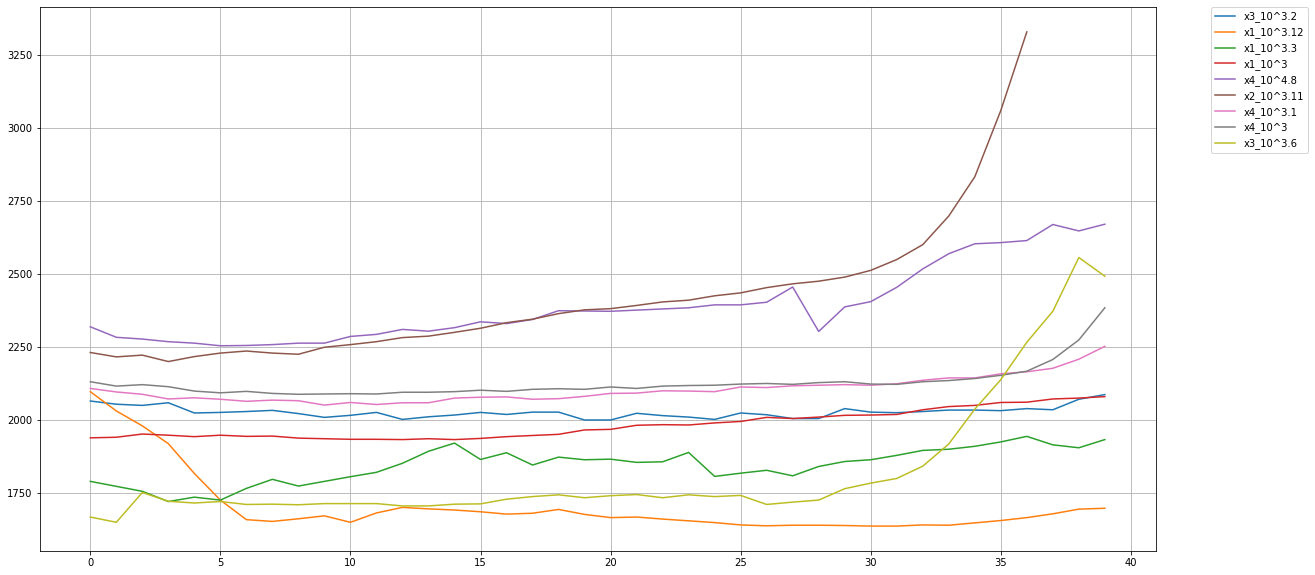

In [ ]:
#drop Neg data
pcr_df = pcr_df.drop(columns=['X1_Neg', 'X2_Neg', 'X3_Neg', 'X4_Neg'])

#drop 10^6 data
pcr_df = pcr_df.drop(columns=['x1_10^6', 'x1_10^6.1',	'x1_10^6.2',	'x1_10^6.3',	'x1_10^6.4',	'x1_10^6.5'
                              ,	'x2_10^6',	'x2_10^6.1',	'x2_10^6.2',	'x2_10^6.3',	'x2_10^6.4'
                              ,	'x3_10^6',	'x3_10^6.1',	'x3_10^6.2',	'x3_10^6.3',	'x3_10^6.4'
                              ,	'x4_10^6',	'x4_10^6.1',	'x4_10^6.2',	'x4_10^6.3'])


#drop weird data
sns.lineplot(data=pcr_df[['x3_10^3.2', 'x1_10^3.12', 'x1_10^3.3', 'x1_10^3', 'x4_10^4.8','x2_10^3.11', 'x4_10^3.1', 'x4_10^3', 'x3_10^3.6']], dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pcr_df = pcr_df.drop(columns=['x3_10^3.2', 'x1_10^3.12', 'x1_10^3.3', 'x1_10^3',  'x4_10^4.8','x2_10^3.11', 'x4_10^3.1', 'x4_10^3', 'x3_10^3.6'])


display(pcr_df)

In [ ]:
pcr_5_df = pd.DataFrame()
pcr_4_df = pd.DataFrame()
pcr_3_df = pd.DataFrame()

#Seperate each concentration(5, 4, 3)
for col in pcr_df.columns:
  if col[6] == '5':
    pcr_5_df = pcr_5_df.append(pcr_df[col])
  elif col[6] == '4':
    pcr_4_df = pcr_4_df.append(pcr_df[col])
  elif col[6] == '3':
    pcr_3_df = pcr_3_df.append(pcr_df[col])


print(f'10^5:{pcr_5_df.shape[0], pcr_5_df.shape[1]}, 10^4:{pcr_4_df.shape[0], pcr_4_df.shape[1]}, 10^3:{pcr_3_df.shape[0], pcr_3_df.shape[1]}')
#display(pcr_5_df)
#display(pcr_4_df)
#display(pcr_3_df)



10^5:(24, 40), 10^4:(71, 40), 10^3:(48, 40)


In [ ]:
pcr_df = pcr_df.T

display(pcr_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
X1_10^5,2091,2077,2068,2056,2053,2037,2039,2033,2028,2025,2023,2021,2033,2031,2028,2024,2025,2024,2026,2029,2033,2041,2045,2054,2073,2099,2158,2269,2446,2688,2964,3243,3512,3760,3980,4080,4080,4080,4080,4080
X1_10^5.1,2105,2094,2085,2065,2056,2051,2058,2066,2062,2061,2054,2056,2050,2053,2052,2053,2054,2056,2053,2055,2059,2060,2061,2072,2083,2104,2143,2220,2346,2532,2768,3025,3277,3518,3729,3920,4080,4080,4080,4080
X1_10^5.2,1953,1939,1916,1908,1895,1883,1881,1876,1872,1871,1870,1868,1875,1872,1873,1872,1871,1867,1866,1868,1865,1868,1875,1878,1882,1890,1905,1931,1986,2068,2221,2445,2728,3046,3367,3685,3969,4080,4080,4080
X1_10^5.3,1811,1810,1806,1797,1798,1795,1792,1787,1782,1780,1775,1770,1773,1772,1774,1768,1772,1774,1770,1777,1777,1778,1783,1789,1792,1804,1823,1860,1921,2039,2220,2469,2761,3060,3350,3623,3874,4080,4080,4080
X1_10^5.4,2048,2039,2022,2022,2015,2013,2007,2010,2012,2012,2011,2012,2014,2016,2018,2022,2024,2022,2029,2032,2033,2034,2037,2038,2045,2042,2055,2067,2083,2120,2192,2314,2521,2799,3123,3457,3785,4080,4080,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x4_10^3.9,2368,2352,2327,2315,2313,2299,2285,2285,2276,2277,2271,2274,2277,2278,2279,2284,2279,2284,2280,2285,2291,2292,2293,2301,2305,2315,2325,2336,2348,2377,2424,2517,2661,2860,3111,3384,3609,3913,4080,4080
x4_10^3.10,2754,2750,2743,2728,2712,2691,2701,2710,2727,2730,2727,2728,2722,2718,2727,2727,2741,2717,2709,2719,2716,2702,2705,2700,2700,2710,2731,2729,2731,2731,2737,2737,2765,2791,2865,2982,3165,3409,3705,4040
x4_10^3.11,2598,2567,2550,2540,2539,2532,2523,2515,2514,2512,2512,2502,2496,2498,2497,2494,2489,2491,2485,2484,2484,2494,2495,2496,2500,2505,2512,2518,2518,2528,2542,2565,2619,2716,2886,3126,3429,3706,4002,4080
x4_10^3.12,2913,2851,2825,2798,2776,2756,2739,2727,2722,2720,2719,2724,2719,2712,2722,2725,2723,2716,2722,2720,2727,2731,2731,2737,2744,2748,2755,2761,2771,2788,2797,2816,2848,2911,3019,3189,3423,3690,3976,4080


In [ ]:
#Get target
target_arr = []
target_3 = []
target_4 = []
target_5 = []

for index, row in pcr_df.iterrows():
  if index[6] == '5':
    target_arr.append(27.94744)
    target_5.append(27.94744)
  elif index[6] == '4':
    target_arr.append(31.09441)
    target_4.append(31.09441)
  elif index[6] == '3':
    target_arr.append(33.58142)
    target_3.append(33.58142)

target_arr = np.array(target_arr)
target_3 = np.array(target_3)
target_4 = np.array(target_4)
target_5 = np.array(target_5)

print(target_arr)

[27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744
 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744
 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744 27.94744
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441
 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 31.09441 33.58142
 33.58142 33.58142 33.58142 33.58142 33.58142 33.58142 33.58142 33.58142
 33.58142 33.58142 33.58142 33.58142 33.58142 33.58

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("Cuda Activated")
else:
  device = torch.device("cpu")
  print("Cuda Not Activated")

Cuda Not Activated


In [ ]:
test_size = (12, 18, 6)

#10^3 tensor
data_3 = torch.tensor(pcr_3_df.values.astype(np.float32)).to(device)
target_3 = torch.tensor(target_3.astype(np.float32)).to(device)

dataset_3 = data_utils.TensorDataset(data_3, target_3)
splited_dataset_3 = data_utils.random_split(dataset_3, [12, 12, 12, 12])#48


#10^4 tensor
data_4 = torch.tensor(pcr_4_df.values.astype(np.float32)).to(device)
target_4 = torch.tensor(target_4.astype(np.float32)).to(device)

dataset_4 = data_utils.TensorDataset(data_4, target_4)
splited_dataset_4 = data_utils.random_split(dataset_4, [18, 18, 18, 17])#71


#10^5 tensor
data_5 = torch.tensor(pcr_5_df.values.astype(np.float32)).to(device)
target_5 = torch.tensor(target_5.astype(np.float32)).to(device)

dataset_5 = data_utils.TensorDataset(data_5, target_5)
splited_dataset_5 = data_utils.random_split(dataset_5, [6, 6, 6, 6])#24

In [ ]:
#Definition of model
import torch.optim as optim

class Net(nn.Module):
  def __init__(self):
    super().__init__()

    self.c1 = nn.Conv1d(1, 10, 9)
    self.p1 = nn.MaxPool1d(2)

    self.fc1 = nn.Linear(160, 300)
    self.fc2 = nn.Linear(300, 100)
    self.fc3 = nn.Linear(100, 1)

    self.dropout = nn.Dropout(0.1)

  def forward(self, x):
    x = F.relu(self.c1(x))
    x = self.p1(x)

    x = x.view(-1)

    x = F.relu(self.fc1(x))

    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

In [ ]:
model = Net()
print(model)

if torch.cuda.is_available():
  model.cuda()
  print("model can use cuda")

Net(
  (c1): Conv1d(1, 10, kernel_size=(9,), stride=(1,))
  (p1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [ ]:
from torch.optim import Adam
from torch.nn import L1Loss
loss_func = L1Loss()

optimizer = Adam(model.parameters(), lr = 0.00001)

In [ ]:
from pathlib import Path

model_path = Path("models").expanduser()
save_path = model_path.joinpath(f'pcr_model_{0}.pt')

In [ ]:
BATCH_NUM = 27
epochs_num = 3000
iter_num = 1

result_target = []
result_output = []
result_loss = []


for iter in range(1, iter_num+1):

  for test_ind in range(4):
    print(f"Network {test_ind} : start!!")
    model = Net()
    loss_func = L1Loss()
    optimizer = Adam(model.parameters(), lr = 0.00001)
    save_path = model_path.joinpath(f'pcr_model_{iter}_{test_ind}.pt')

    train_arr = []
    test_arr = []
    train_test = []
    test_test = []

    ####################################set train, test set######################################
    for split_ind in range(4):
      if split_ind == test_ind:
        test_arr.append(splited_dataset_3[split_ind])
        test_arr.append(splited_dataset_4[split_ind])
        test_arr.append(splited_dataset_5[split_ind])
        test_test.append(split_ind)
        continue

      train_arr.append(splited_dataset_3[split_ind])
      train_arr.append(splited_dataset_4[split_ind])
      train_arr.append(splited_dataset_5[split_ind])
      train_test.append(split_ind)

    #Concat Datasets
    train_tensor = data_utils.ConcatDataset(train_arr)
    test_tensor = data_utils.ConcatDataset(test_arr)

    #Get train, test loaders
    train_loader = data_utils.DataLoader(train_tensor, batch_size=BATCH_NUM, shuffle = True)
    test_loader = data_utils.DataLoader(test_tensor, shuffle = False)
    ############################################################################################

    
    #Init loss variable
    valid_loss_min = np.Inf
    train_losses = []
    valid_losses = []

    for epoch in range(1, epochs_num+1):
      train_loss = 0.0
      valid_loss = 0.0

      loader_list = []
      batch_len = 0

      for i, loader in  enumerate(train_loader):
        loader_list.append(loader)
        batch_len += 1

      for valid_ind in range(0, batch_len):
        
        #Actually, the train start is here
        #model.train()

        for train_ind in range(0, batch_len):
        
          if valid_ind == train_ind:
            continue
          
          #####################
          #     Train Start   #
          #####################
          model.train()
          fold_train_loss = 0.0
          
          #Get data&target as much as batch size
          data_loader, target_loader = loader_list[train_ind]
          
          #num of data in "one" batch size
          data_num = len(target_loader)

          for ind in range(0, data_num):
            data = data_loader[ind]
            target = target_loader[ind]

            if torch.cuda.is_available():
              data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data.view([1, 1, -1]))
            loss = loss_func(output, target.view([-1]))
            loss.backward()
            optimizer.step()

            fold_train_loss += loss.item()

          train_loss += fold_train_loss / ((batch_len-1)*data_num)
          ###########################################################

        #####################
        #  Validation Start #
        #####################
        model.eval()
        fold_valid_loss = 0.0
        
        data_loader, target_loader = loader_list[valid_ind]
        data_num = len(target_loader)
        
        for ind in range(0, data_num):
          data = data_loader[ind]
          target = target_loader[ind]

          if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

          output = model(data.view([1, 1, -1]))
          loss = loss_func(output, target.view([-1]))

          fold_valid_loss += loss.item()

        valid_loss += fold_valid_loss / data_num
        ###########################################################
    
      train_loss = train_loss/batch_len
      valid_loss = valid_loss/batch_len

      train_losses.append(train_loss)
      valid_losses.append(valid_loss) 

      print(f'test_ind: {test_ind}, Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss}')

      if valid_loss <= valid_loss_min:
        print(f'Validation loss decreased ({valid_loss_min} --> {valid_loss}).  Saving model ...')

        torch.save(model.state_dict(), save_path)
        valid_loss_min = valid_loss
    
    model.load_state_dict(torch.load(save_path))

    loss_func = L1Loss()
    for data, target in test_loader:
      output = model(data.unsqueeze(1))
      loss = loss_func(output, target)

      result_target.append(target)
      result_output.append(output)
      result_loss.append(loss)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
test_ind: 2, Epoch: 1106, train_loss: 1.4895130469475266, valid_loss: 1.5776361726288104
test_ind: 2, Epoch: 1107, train_loss: 1.5320567955658306, valid_loss: 1.5065862296992898
test_ind: 2, Epoch: 1108, train_loss: 1.6042078207021426, valid_loss: 1.4844697900647112
test_ind: 2, Epoch: 1109, train_loss: 1.579467338940583, valid_loss: 1.5693743942130325
test_ind: 2, Epoch: 1110, train_loss: 1.445499872323568, valid_loss: 1.5770545685053552
test_ind: 2, Epoch: 1111, train_loss: 1.482706133343442, valid_loss: 1.3562955122727613
test_ind: 2, Epoch: 1112, train_loss: 1.6138685931507337, valid_loss: 1.7833845194248732
test_ind: 2, Epoch: 1113, train_loss: 1.7618697183197831, valid_loss: 1.6654728131416516
test_ind: 2, Epoch: 1114, train_loss: 1.6069282905781488, valid_loss: 1.5836161860713251
test_ind: 2, Epoch: 1115, train_loss: 1.48148839494102, valid_loss: 1.5038259599962807
test_ind: 2, Epoch: 1116, train_loss: 1.4717235436127059, valid_loss: 1.6801377

In [ ]:
print(result_output)
print(result_target)

[tensor([33.7156], grad_fn=<AddBackward0>), tensor([24.3219], grad_fn=<AddBackward0>), tensor([22.8295], grad_fn=<AddBackward0>), tensor([34.3811], grad_fn=<AddBackward0>), tensor([31.7448], grad_fn=<AddBackward0>), tensor([30.8835], grad_fn=<AddBackward0>), tensor([24.9252], grad_fn=<AddBackward0>), tensor([33.8593], grad_fn=<AddBackward0>), tensor([30.7616], grad_fn=<AddBackward0>), tensor([29.9242], grad_fn=<AddBackward0>), tensor([27.4534], grad_fn=<AddBackward0>), tensor([29.6831], grad_fn=<AddBackward0>), tensor([30.3794], grad_fn=<AddBackward0>), tensor([28.8411], grad_fn=<AddBackward0>), tensor([31.3692], grad_fn=<AddBackward0>), tensor([21.5869], grad_fn=<AddBackward0>), tensor([31.3066], grad_fn=<AddBackward0>), tensor([30.0153], grad_fn=<AddBackward0>), tensor([25.2552], grad_fn=<AddBackward0>), tensor([31.0555], grad_fn=<AddBackward0>), tensor([35.6068], grad_fn=<AddBackward0>), tensor([32.9595], grad_fn=<AddBackward0>), tensor([30.3727], grad_fn=<AddBackward0>), tensor([24

In [ ]:
output_arr = []
target_arr = []

output3_arr = []
output4_arr = []
output5_arr = []

for i in range(len(result_output)):
  target = result_target[i].to('cpu').tolist()[0]
  output = result_output[i].to('cpu').tolist()[0]

  target_arr.append(target)
  output_arr.append(output)

  if target == 33.5814208984375:
    output3_arr.append(output)
  elif target == 31.094409942626953:
    output4_arr.append(output)
  elif target == 27.947439193725586:
    output5_arr.append(output)

In [ ]:
_dict = {'target' : target_arr, 'output': output_arr}

pd_result = pd.DataFrame(_dict)

display(pd_result)

,target,output
0,33.581421,33.715576
1,33.581421,24.321924
2,33.581421,22.829470
3,33.581421,34.381062
4,33.581421,31.744780
...,...,...
138,27.947439,30.169718
139,27.947439,28.932240
140,27.947439,31.107109
141,27.947439,27.575043


TypeError: ignored

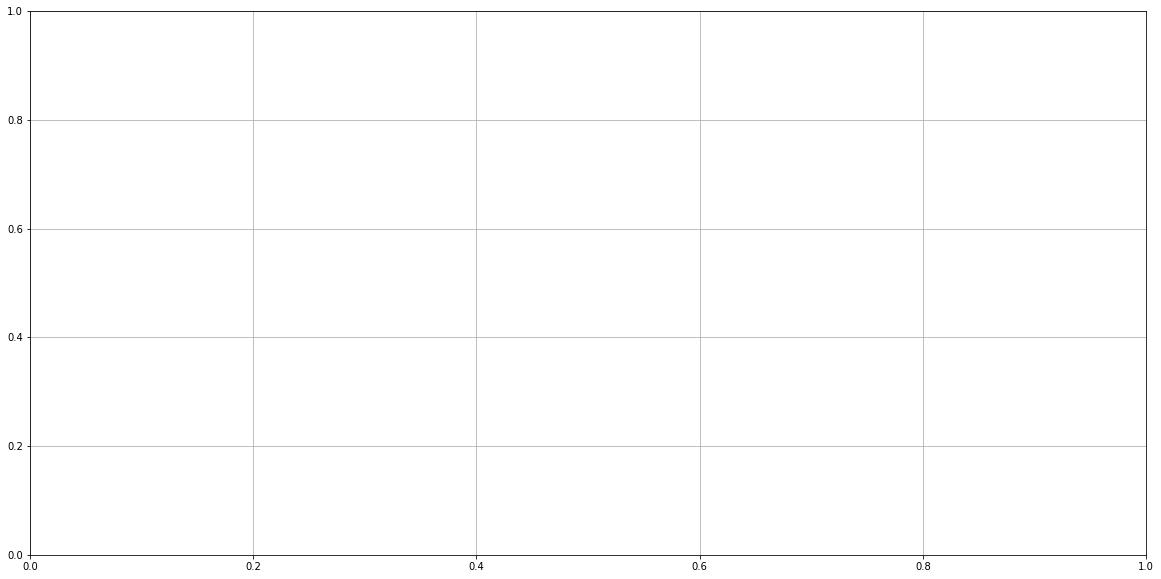

In [ ]:
pd_result_gt = pd_result.groupby('target')
sns.boxplot(x='output', 
                y='target', 
                hue='target', # different colors by group
                s=100, # marker size
                data=pd_result)

plt.show()